<h1><b>Heart Disease Prediction Using Machine Learning</b></h1>

<h3>Libraries Import</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sklearn as sk
import seaborn as sns

<h3>Load DataSet/Data Acquistion</h3>

In [2]:
data = pd.read_csv('framingham.csv')
df_fhs = data.copy()

**Scanning Data**

In [3]:
#display top 10 rows
df_fhs.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
#display bottom 10 rows
df_fhs.tail(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [5]:
#rows , columns
df_fhs.shape

(4240, 16)

In [6]:
#basic info of dataset
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
#basic description
df_fhs.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df_fhs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
male,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


<h2>Filtering Data</h2>

In [9]:
df_fhs.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_fhs.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
(df_fhs.isnull().sum()/len(df_fhs))*100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [12]:
#using missinqno for missing values
import missingno as msno

<Axes: >

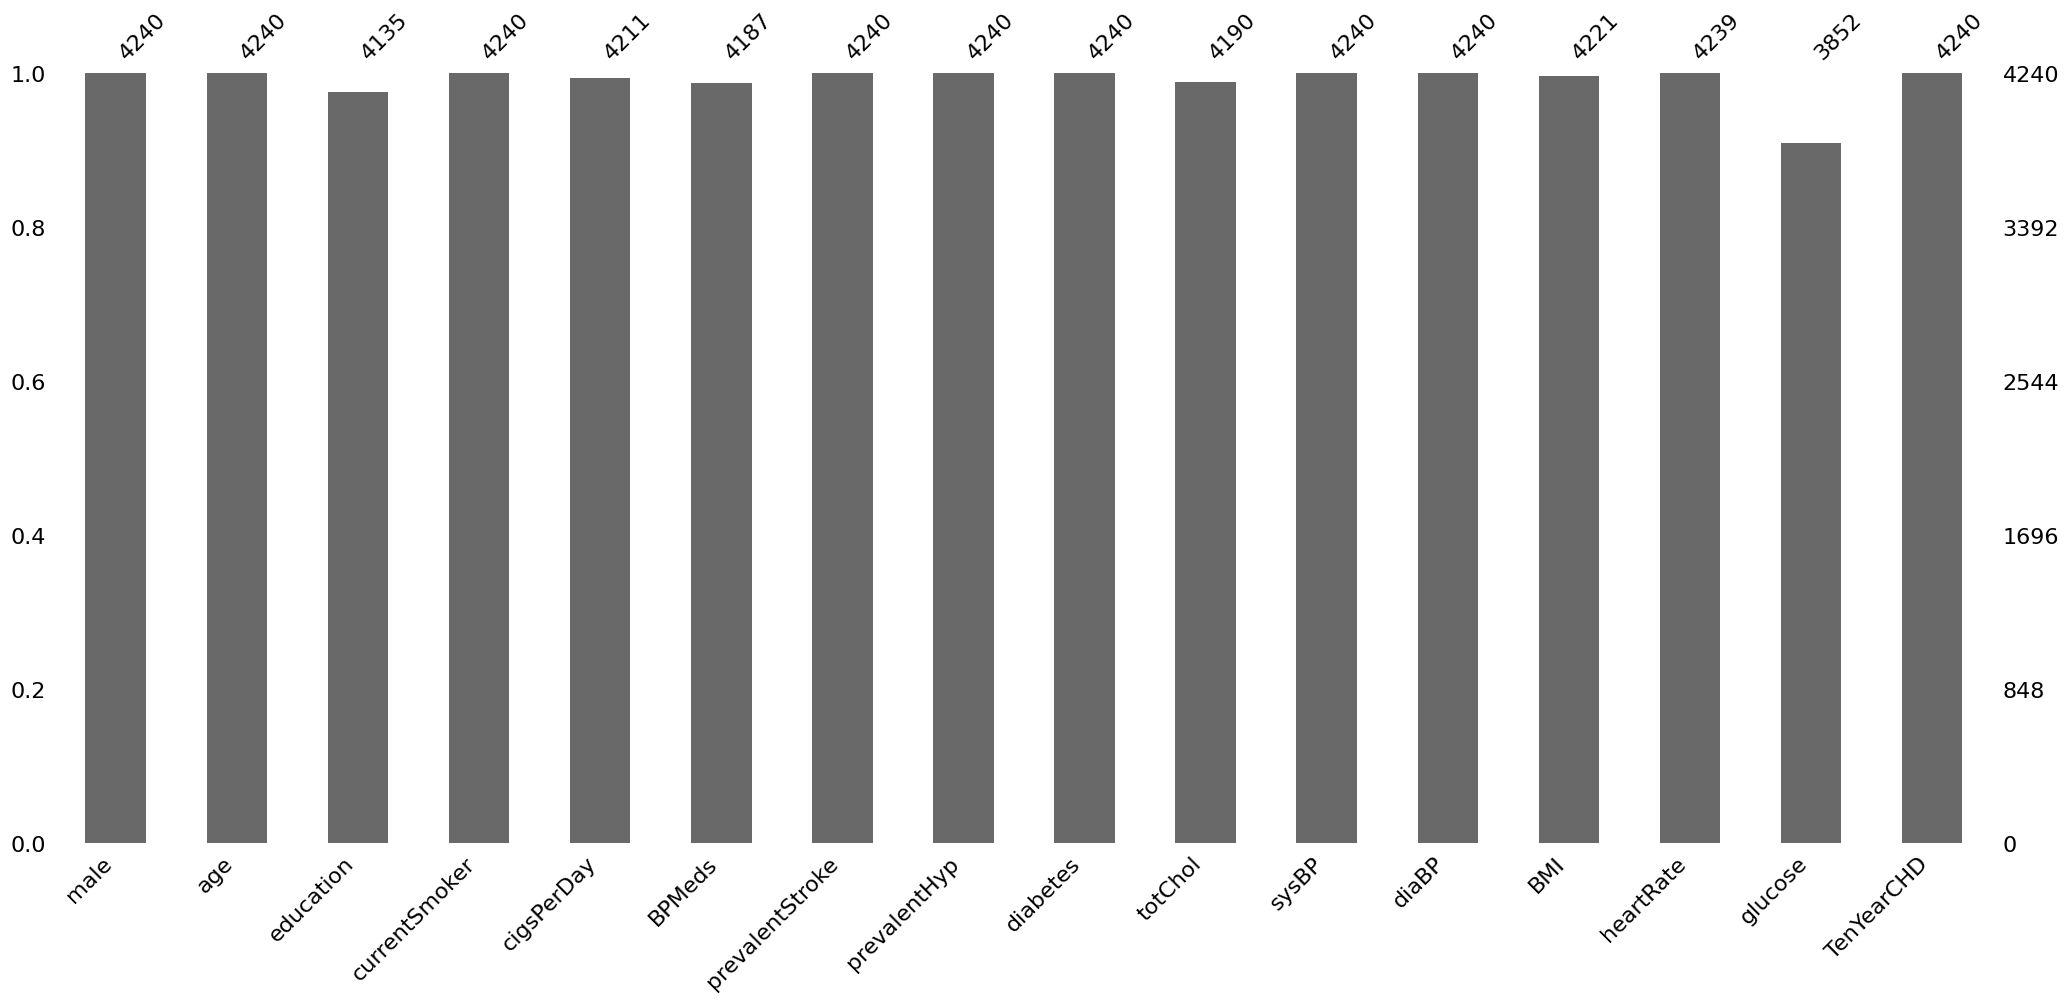

In [13]:
msno.bar(df_fhs)

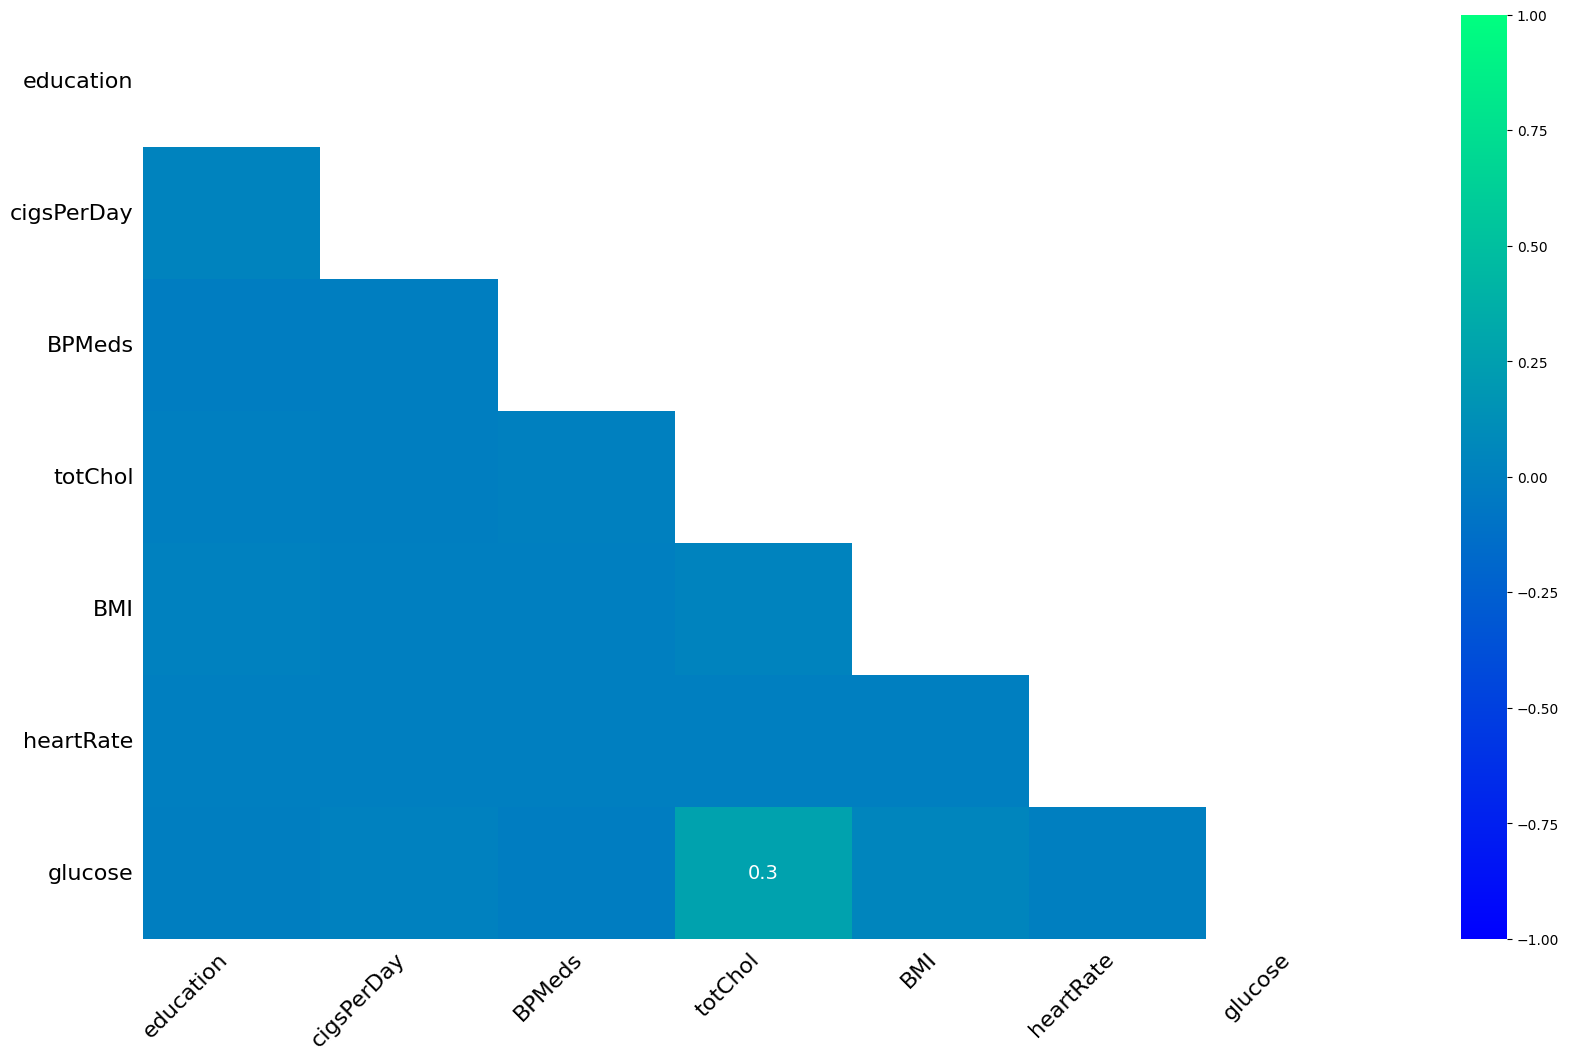

In [14]:
msno.heatmap(df_fhs,cmap='winter')
plt.show()

**Missing Values**

In [51]:
df_fhs.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Duplicate Values**

In [54]:
df_fhs.duplicated().sum()

np.int64(0)

<h4>Transformation</h4>

In [55]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.8 KB


<h4>Data Exploration</h4>

In [59]:
df_fhs['TenYearCHD'].value_counts(normalize=True)

TenYearCHD
0    0.847731
1    0.152269
Name: proportion, dtype: float64

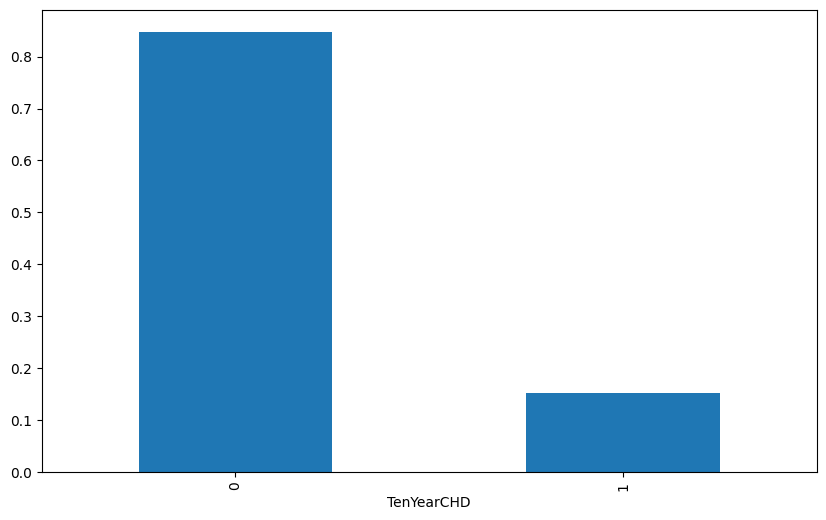

In [113]:
plt.figure(figsize=(10,6))
df_fhs['TenYearCHD'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [63]:
df_fhs.groupby('male').mean()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,49.738575,1.964128,0.397052,5.509091,0.038329,0.005897,0.311057,0.025061,239.616708,133.265111,82.362408,25.517386,76.964128,81.790172,0.122850
1,49.317930,2.000616,0.604436,13.434381,0.020333,0.005545,0.312384,0.029575,233.375847,131.248922,83.612446,26.115595,74.184227,81.931608,0.189156


In [64]:
df_fhs.groupby('male')['TenYearCHD'].mean()

male
0    0.122850
1    0.189156
Name: TenYearCHD, dtype: float64

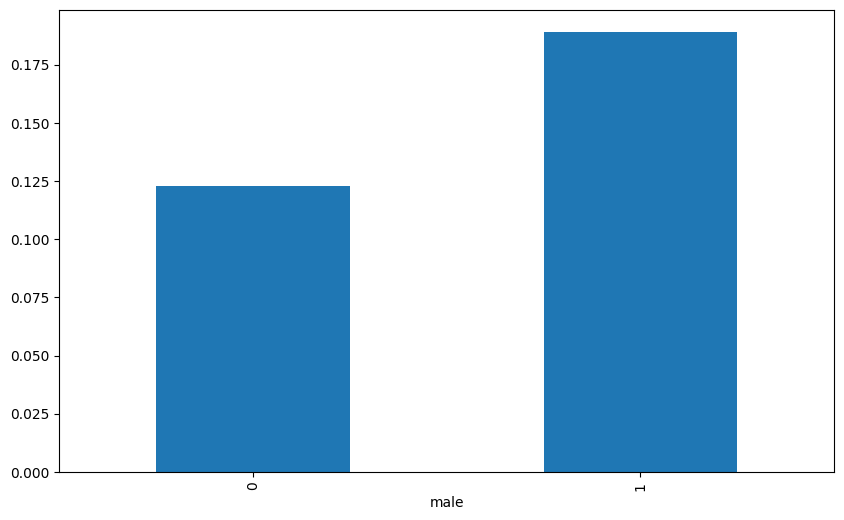

In [112]:
plt.figure(figsize=(10,6))
df_fhs.groupby('male')['TenYearCHD'].mean().plot(kind='bar')
plt.show()

<Figure size 1000x600 with 0 Axes>

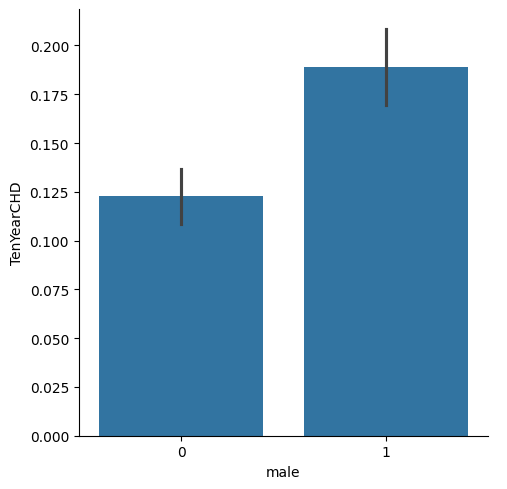

In [111]:
plt.figure(figsize=(10,6))
sns.catplot(data=df_fhs, y='TenYearCHD', x='male', kind='bar')
plt.show()

<Axes: xlabel='totChol', ylabel='sysBP'>

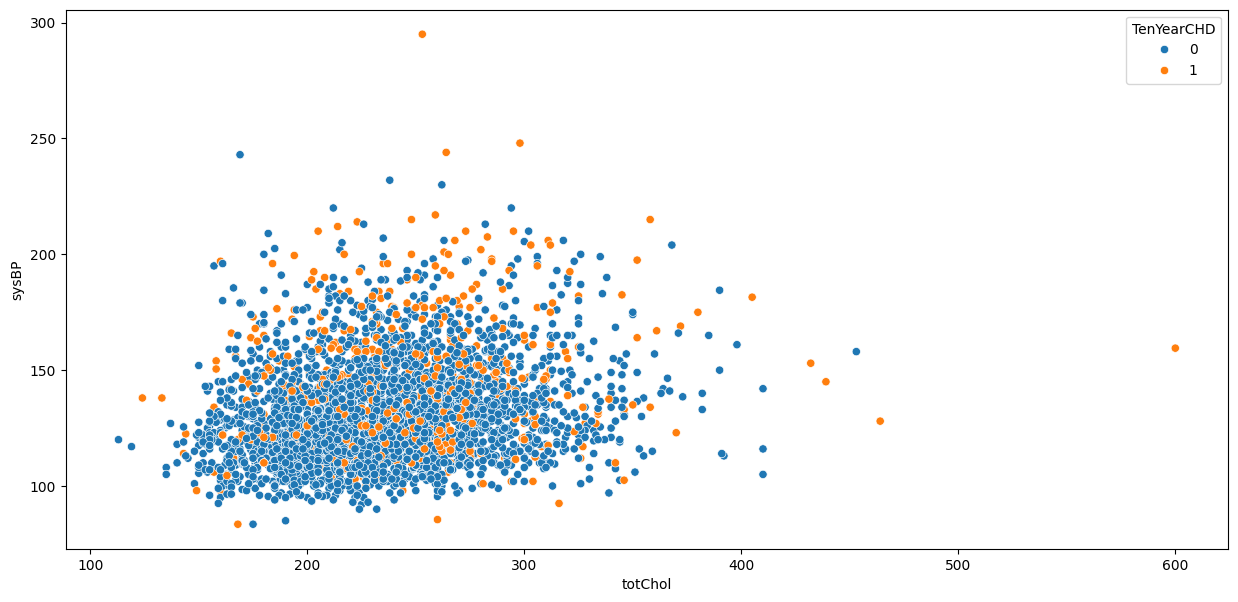

In [73]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df_fhs, y='sysBP', x='totChol', hue='TenYearCHD')

<Axes: xlabel='totChol', ylabel='sysBP'>

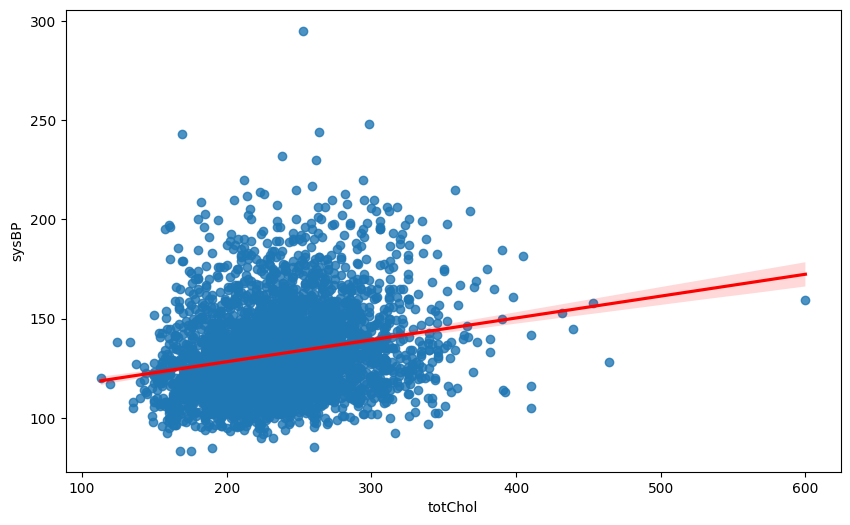

In [109]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_fhs, y='sysBP', x='totChol', line_kws={"color": "red"})

<Axes: xlabel='age', ylabel='count'>

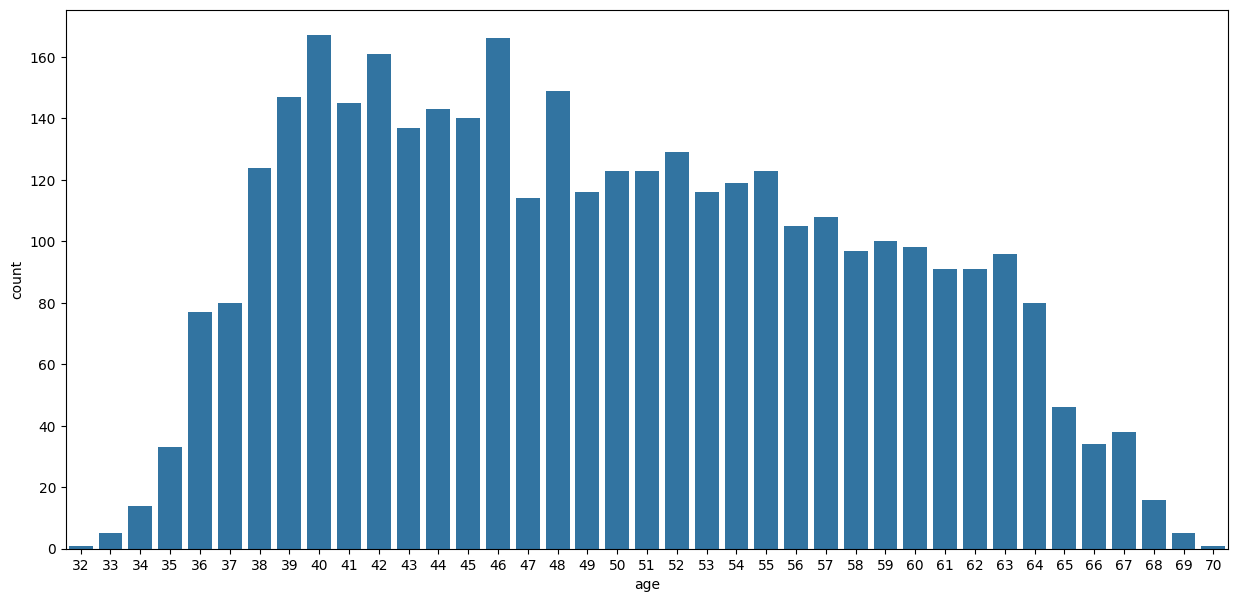

In [85]:
plt.figure(figsize=(15,7))
sns.countplot(data=df_fhs, x='age')

In [87]:
#age categories
df_fhs['age_cat'] = pd.cut(
    df_fhs['age'], 
    bins=[0, 35, 40, 45, 50, 55, 60, 65, float('inf')], 
    labels=['<35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '>65'],
    right=False  
)

Assign each category a value

In [89]:
age_cat_mapping = {
    '<35': 0,
    '35-40': 1,
    '40-45': 2,
    '45-50': 3,
    '50-55': 4,
    '55-60': 5,
    '60-65': 6,
    '>65': 7
}
df_fhs['age_cat_num'] = df_fhs['age_cat'].map(age_cat_mapping)


<Axes: xlabel='age_cat_num', ylabel='count'>

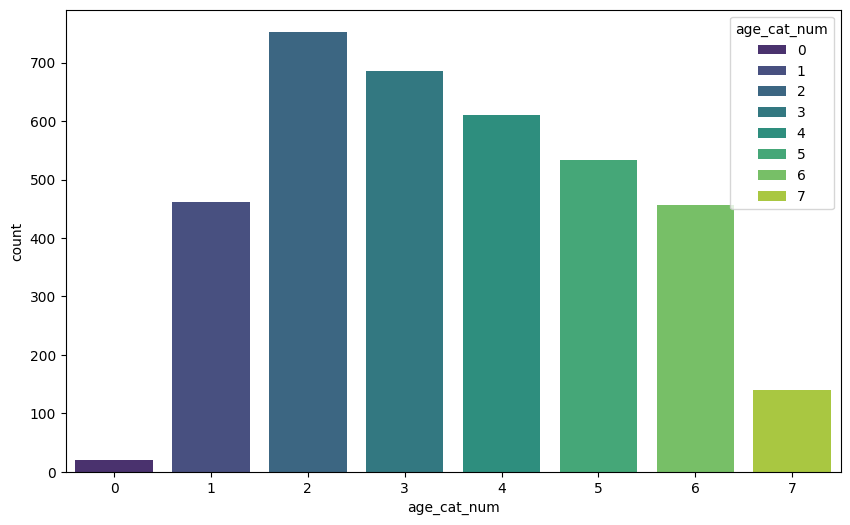

In [107]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_cat_num', data=df_fhs,hue='age_cat_num', palette='viridis')

<Axes: xlabel='age_cat', ylabel='count'>

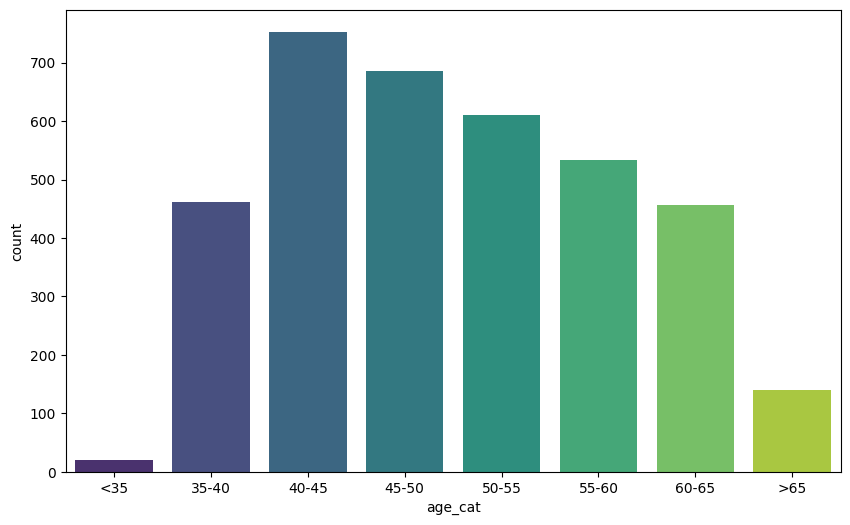

In [108]:
plt.figure(figsize=(10,6))
sns.countplot(x='age_cat', data=df_fhs,hue='age_cat', palette='viridis')

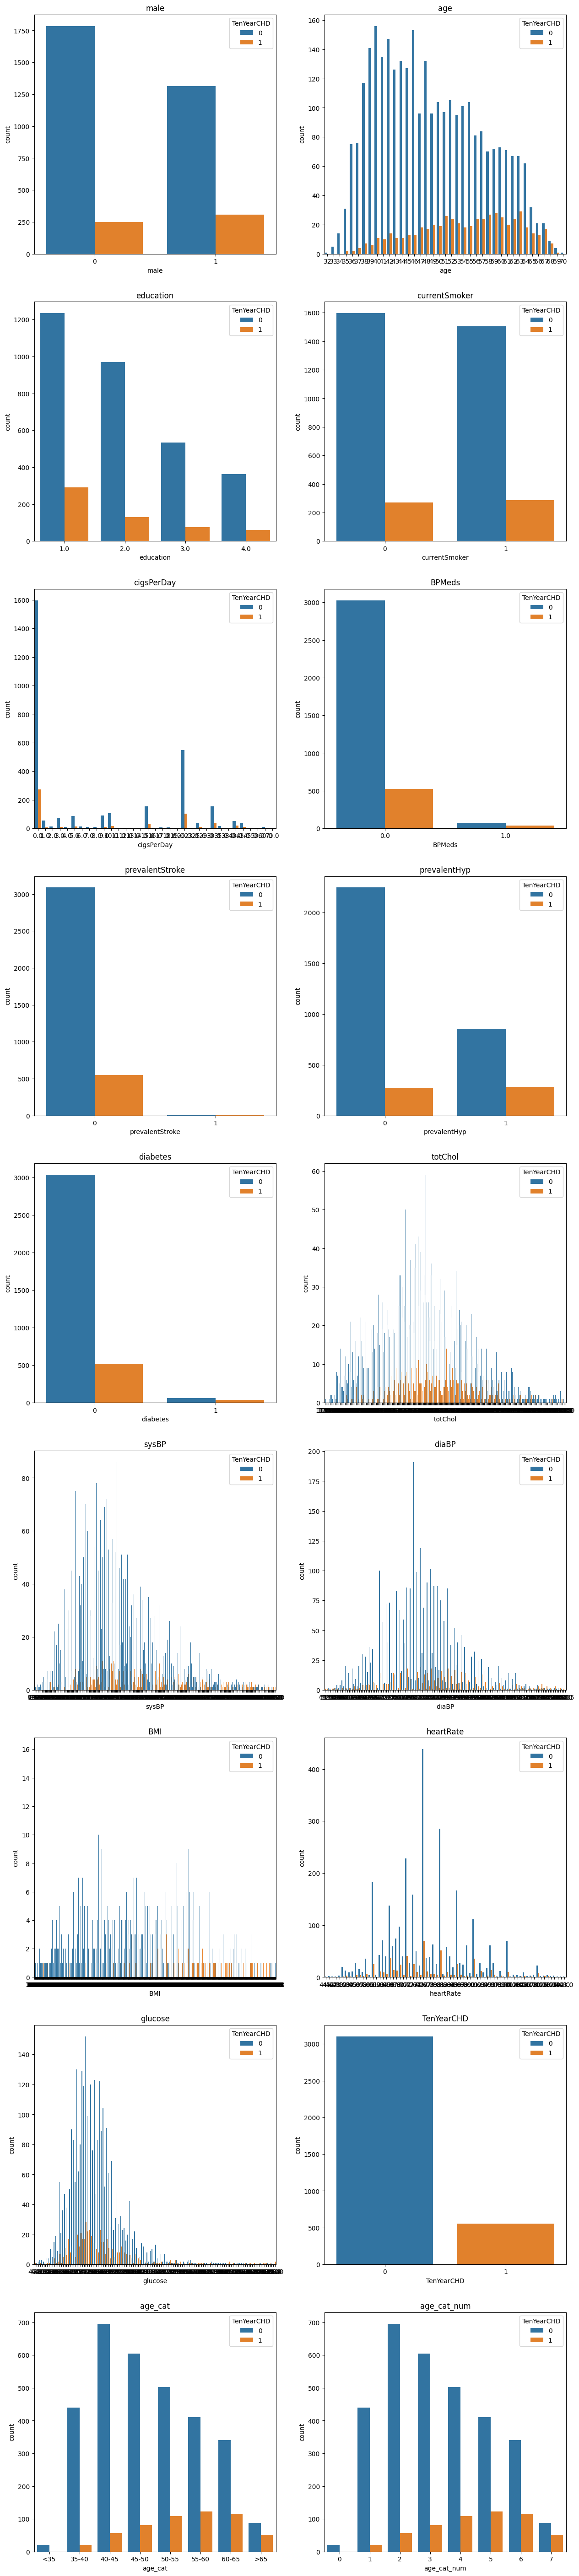

In [118]:
num_cols = len(df_fhs.columns)
num_rows = int(np.ceil(num_cols / 2))
plt.figure(figsize=(15, num_rows * 8))

for i, col in enumerate(df_fhs.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.countplot(data=df_fhs, x=col, hue='TenYearCHD')
    plt.title(col)

In [119]:
df_fhs = df_fhs.drop(['age_cat'],axis=1)

In [120]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   male             3658 non-null   int64   
 1   age              3658 non-null   int64   
 2   education        3658 non-null   float64 
 3   currentSmoker    3658 non-null   int64   
 4   cigsPerDay       3658 non-null   float64 
 5   BPMeds           3658 non-null   float64 
 6   prevalentStroke  3658 non-null   int64   
 7   prevalentHyp     3658 non-null   int64   
 8   diabetes         3658 non-null   int64   
 9   totChol          3658 non-null   float64 
 10  sysBP            3658 non-null   float64 
 11  diaBP            3658 non-null   float64 
 12  BMI              3658 non-null   float64 
 13  heartRate        3658 non-null   float64 
 14  glucose          3658 non-null   float64 
 15  TenYearCHD       3658 non-null   int64   
 16  age_cat_num      3658 non-null   category
dtype

In [121]:
df_fhs['age_cat_num'] = df_fhs['age_cat_num'].astype('category').cat.codes

In [122]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
 16  age_cat_num      3658 non-null   int8   
dtypes: float64(9), int6

In [123]:
df_fhs.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_cat_num
male,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688,-0.026845
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983,0.986526
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279,-0.155475
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165,-0.207137
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014,-0.188517
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152,0.132239
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366,0.050856
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387,0.301989
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431,0.106746
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338,0.266926


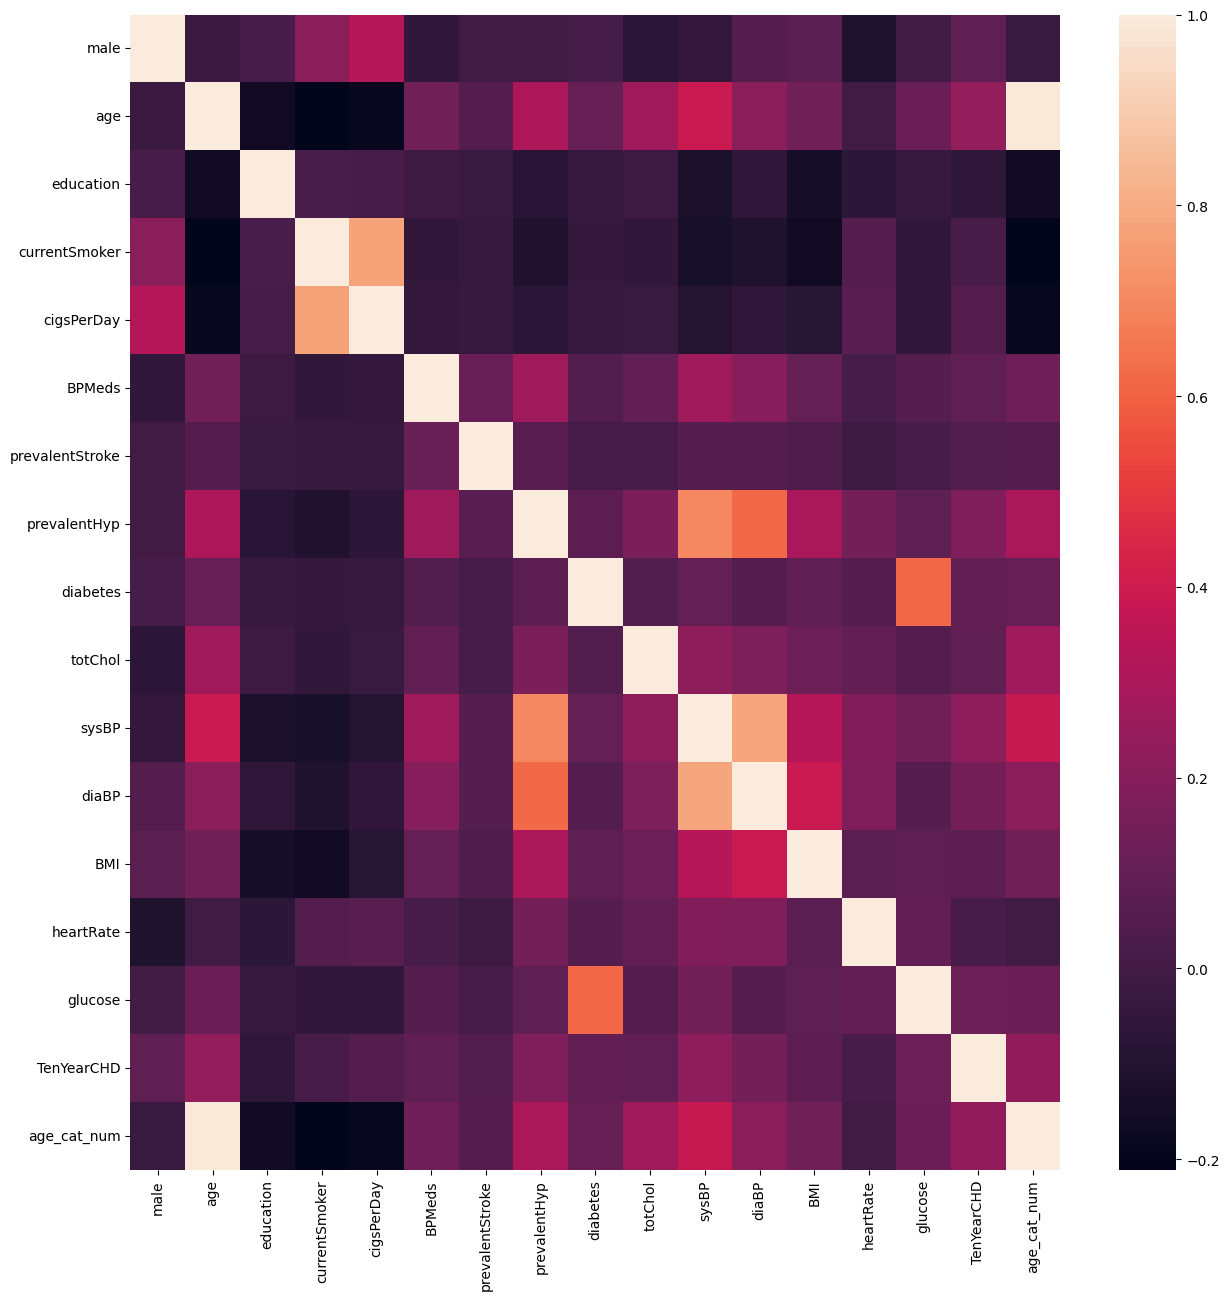

In [125]:
plt.figure(figsize=(15,15))
sns.heatmap(df_fhs.corr())
plt.show()

<Axes: >

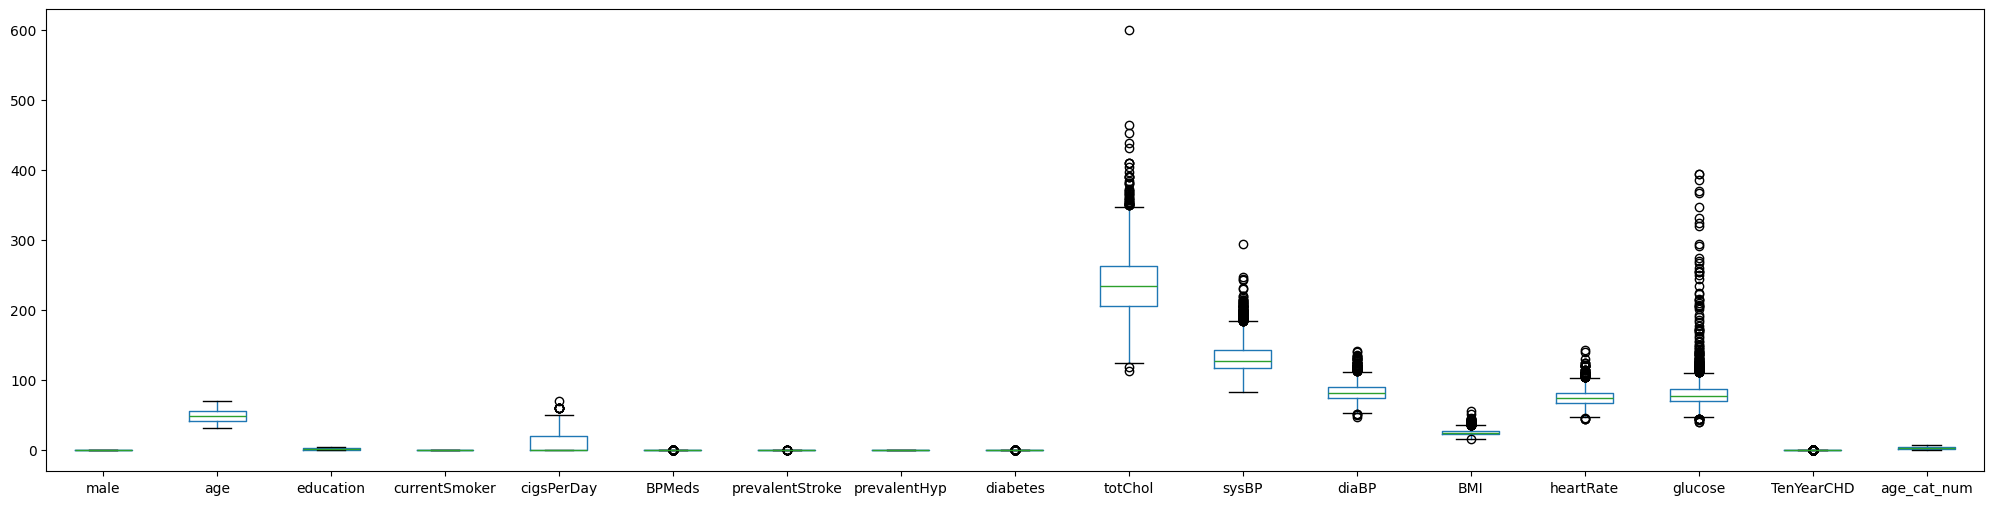

In [132]:
plt.figure(figsize=(25,6))
df_fhs.boxplot(grid=False)

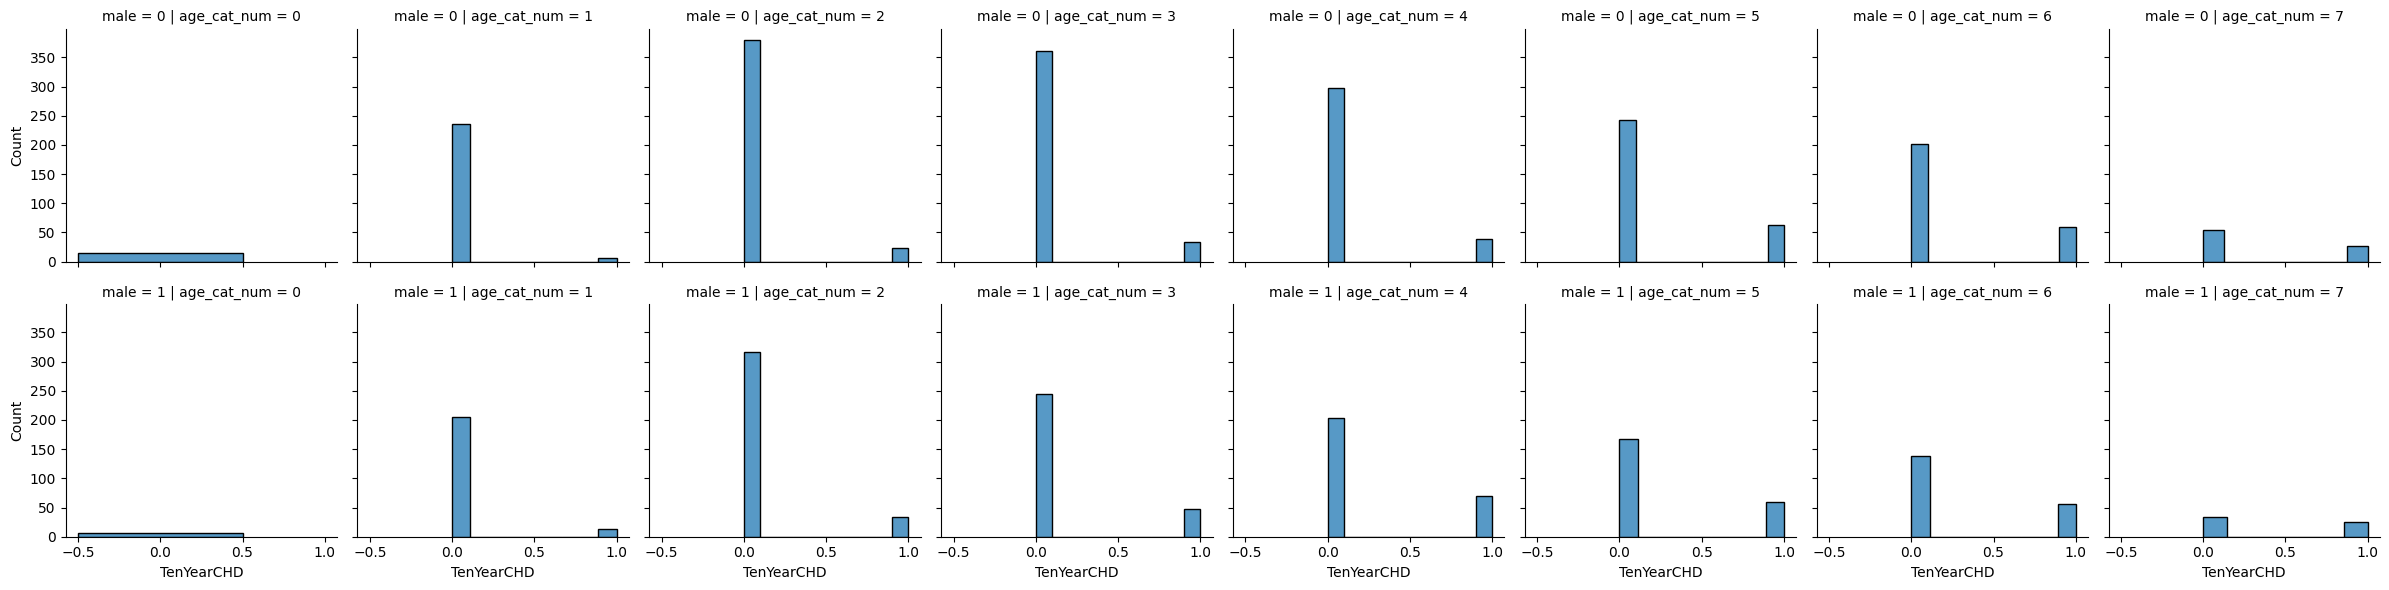

In [135]:
facetgrid = sns.FacetGrid(df_fhs, row='male',col='age_cat_num')
facetgrid.map(sns.histplot,'TenYearCHD')
plt.show()

<Figure size 3000x2000 with 0 Axes>

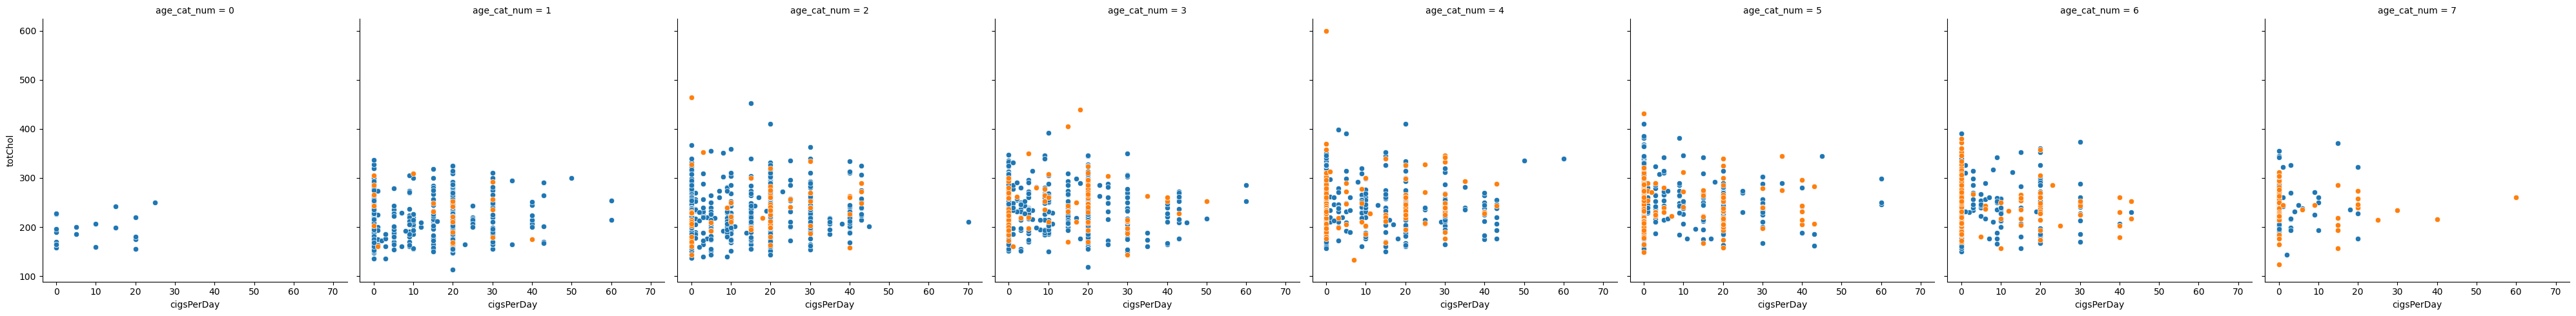

In [144]:
plt.figure(figsize=(30,20))
facetgrid = sns.FacetGrid(df_fhs, hue='TenYearCHD', col='age_cat_num', height=5)
facetgrid.map(sns.scatterplot, 'cigsPerDay','totChol')
plt.show()

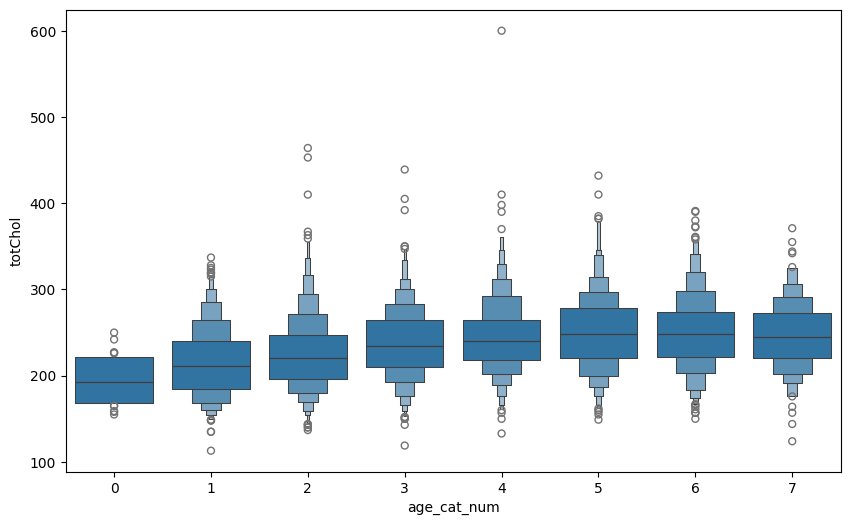

In [149]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxenplot(data=df_fhs,x='age_cat_num', y='totChol', ax=ax)
plt.show()

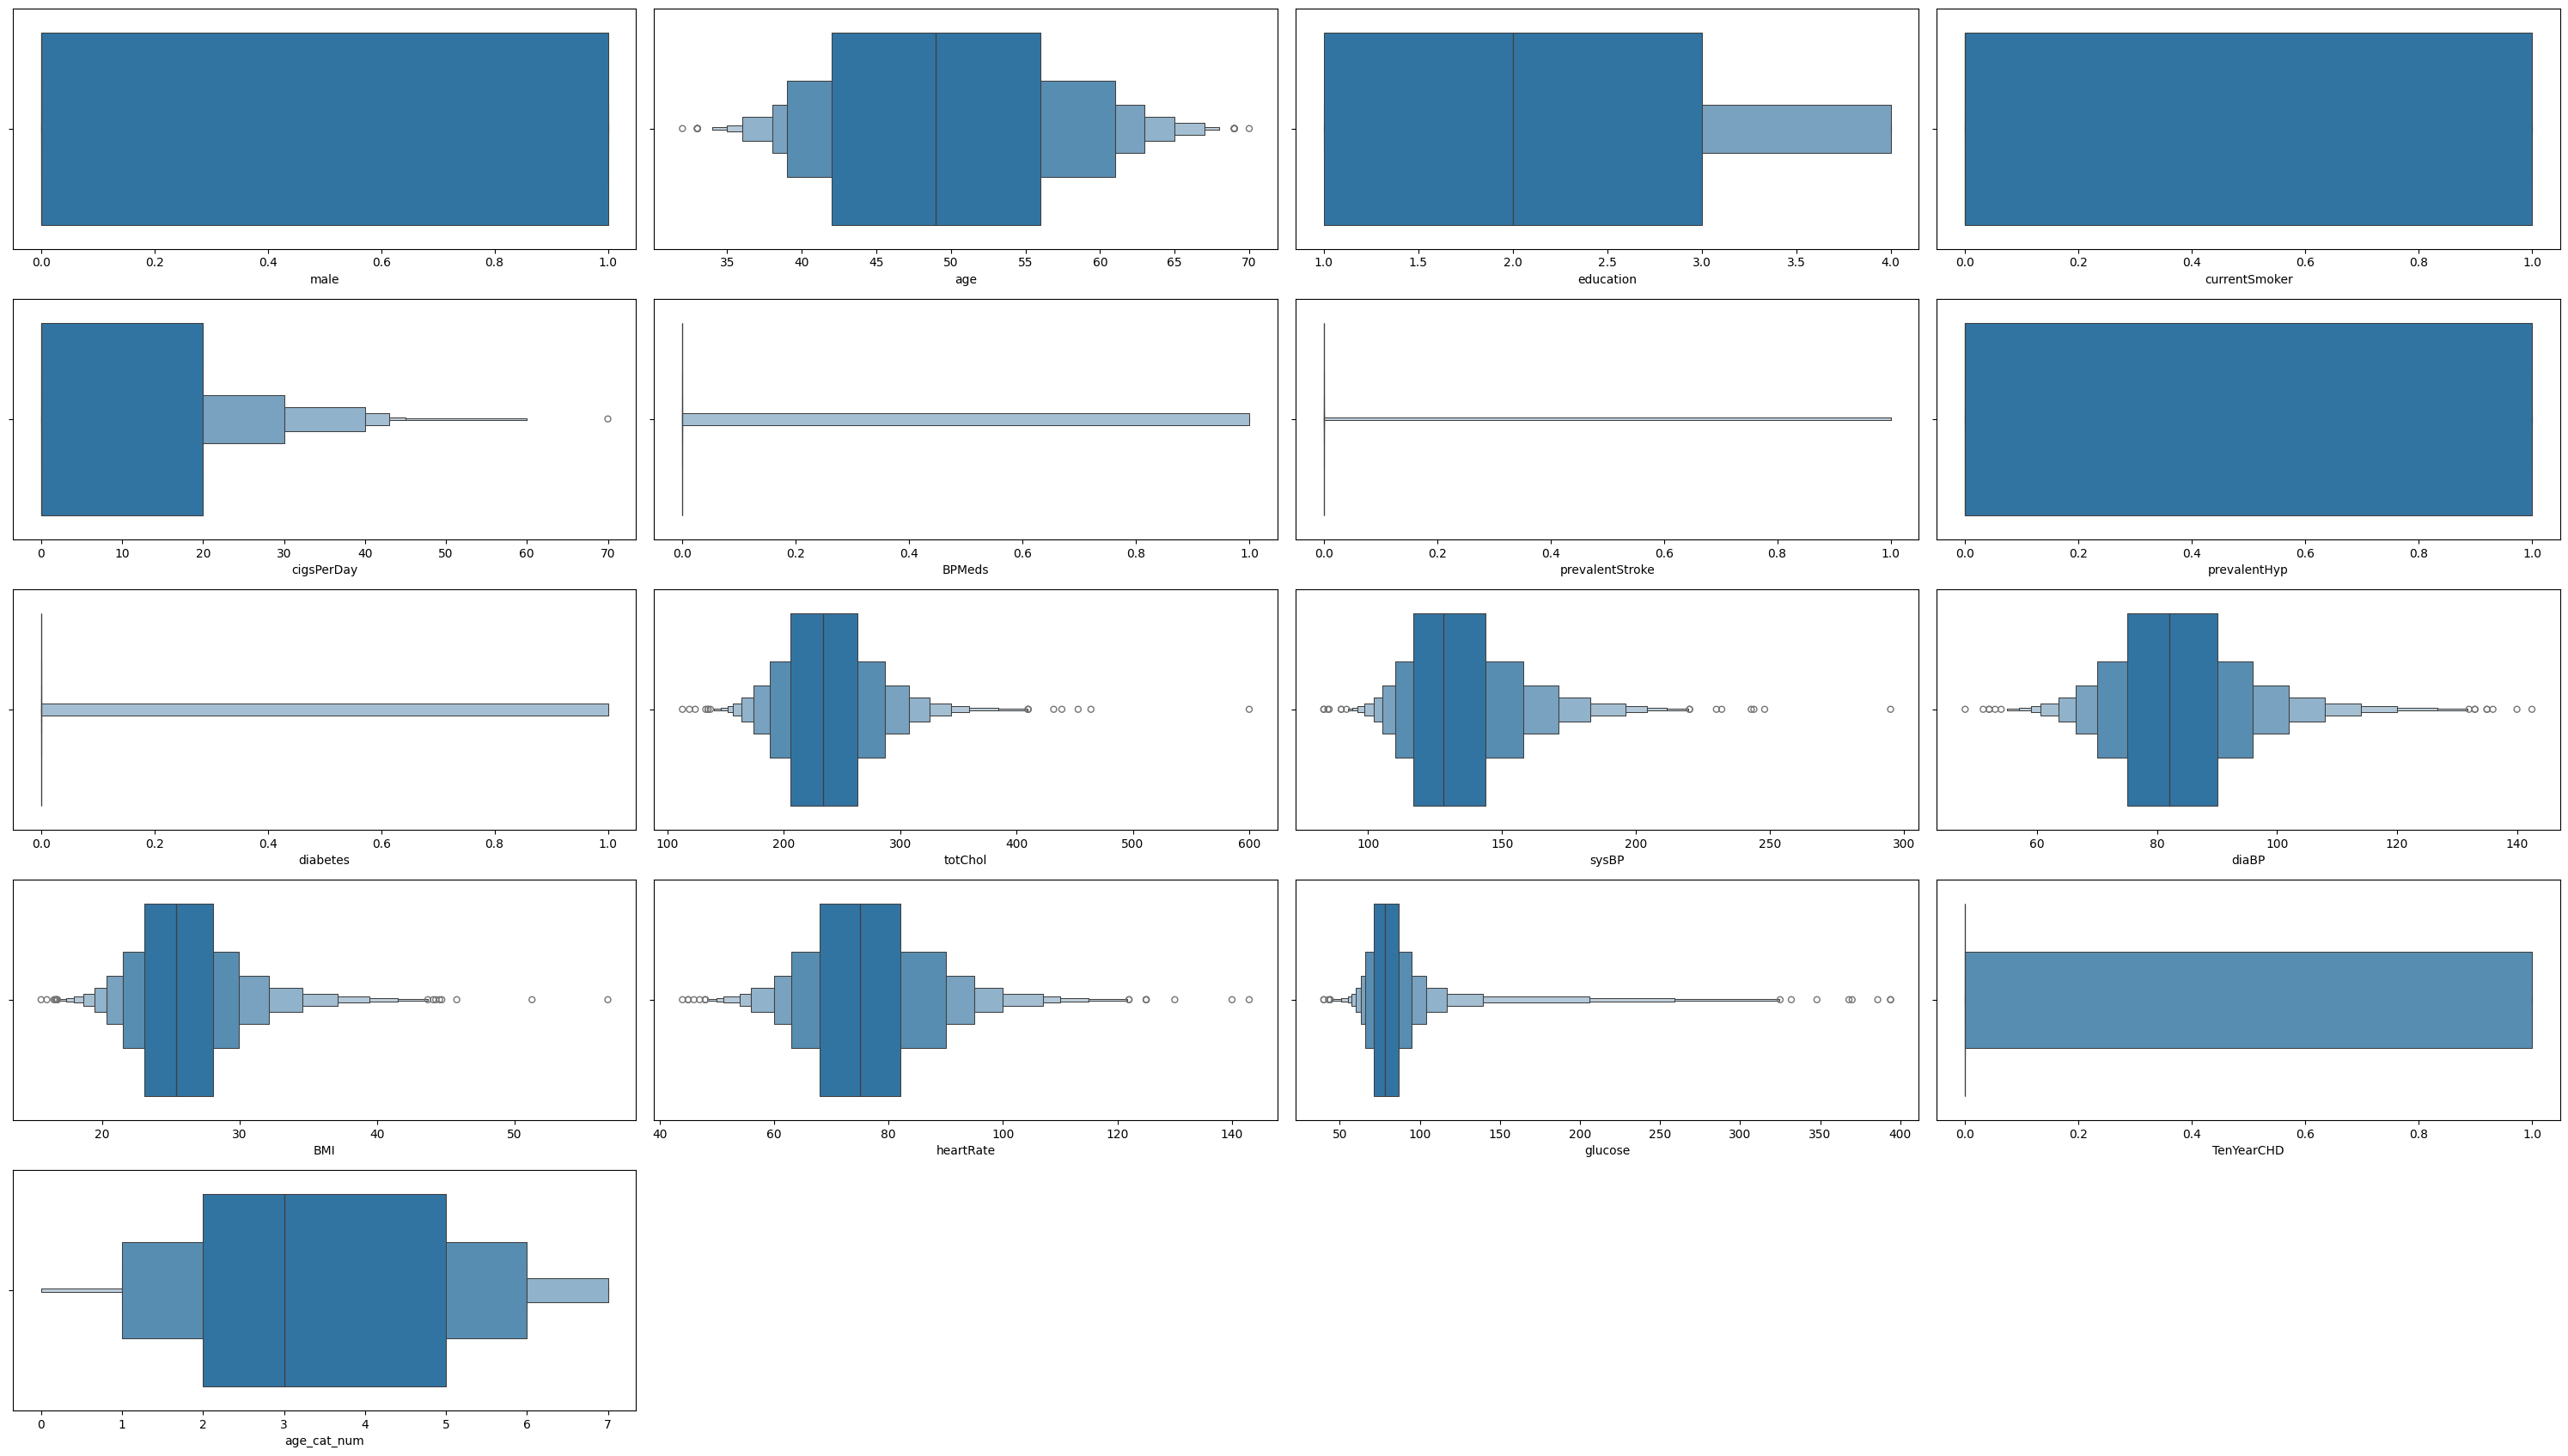

In [151]:
plt.figure(figsize=(30,20))
for i in enumerate(df_fhs.columns):
    plt.subplot(6,4,i[0]+1)
    sns.boxenplot(x=i[1],data=df_fhs)
plt.tight_layout()

<h2>Machine Learning Model</h2>

In [152]:
df_fhs['TenYearCHD'].value_counts()

TenYearCHD
0    3101
1     557
Name: count, dtype: int64

In [153]:
df_fhs['TenYearCHD'].value_counts(normalize=True)

TenYearCHD
0    0.847731
1    0.152269
Name: proportion, dtype: float64

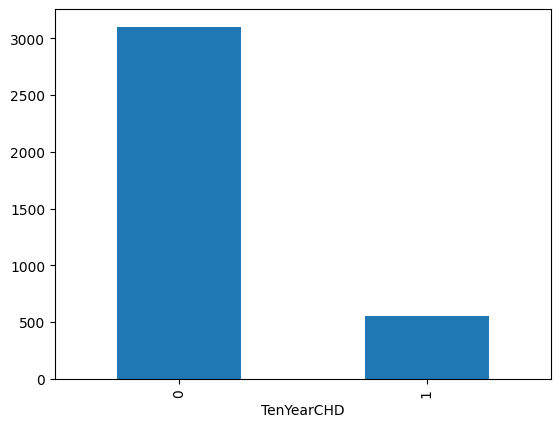

In [154]:
df_fhs['TenYearCHD'].value_counts().plot(kind='bar')
plt.show()

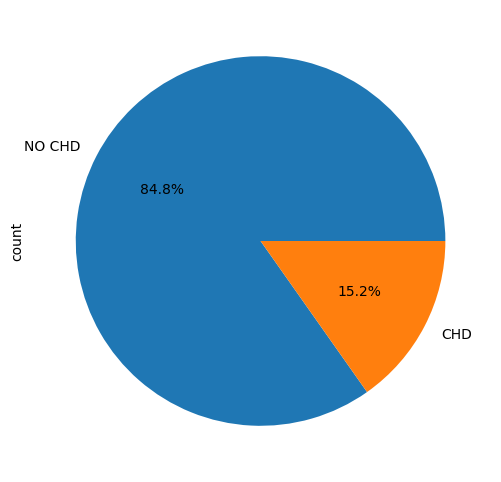

In [157]:
plt.figure(figsize=(10,6))
df_fhs['TenYearCHD'].value_counts().plot(kind='pie',autopct='%1.1f%%', labels=['NO CHD', 'CHD'])
plt.show()

**1st Split**

In [158]:
df_fhs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   int64  
 2   education        3658 non-null   float64
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   int64  
 7   prevalentHyp     3658 non-null   int64  
 8   diabetes         3658 non-null   int64  
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
 16  age_cat_num      3658 non-null   int8   
dtypes: float64(9), int6

In [160]:
# Independent Variable
target_variable = 'TenYearCHD'
X = df_fhs.drop(columns=[target_variable])
X.shape

(3658, 16)

In [161]:
# Target Variable
y = df_fhs['TenYearCHD']
y.shape

(3658,)

**The Synthetic Minority Oversampling (SMOTE)**

In [163]:
from imblearn.over_sampling import SMOTE

In [164]:
os = SMOTE(random_state=0)
X_os, y_os = os.fit_resample(X, y)

In [165]:
X_os.shape, y_os.shape

((6202, 16), (6202,))

In [166]:
y_os.value_counts()

TenYearCHD
0    3101
1    3101
Name: count, dtype: int64

In [168]:
y_os.value_counts(normalize=True)

TenYearCHD
0    0.5
1    0.5
Name: proportion, dtype: float64

In [169]:
df_os = pd.DataFrame(X_os)
df_os['CHD'] = y_os

In [170]:
df_os.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202 entries, 0 to 6201
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             6202 non-null   int64  
 1   age              6202 non-null   int64  
 2   education        6202 non-null   float64
 3   currentSmoker    6202 non-null   int64  
 4   cigsPerDay       6202 non-null   float64
 5   BPMeds           6202 non-null   float64
 6   prevalentStroke  6202 non-null   int64  
 7   prevalentHyp     6202 non-null   int64  
 8   diabetes         6202 non-null   int64  
 9   totChol          6202 non-null   float64
 10  sysBP            6202 non-null   float64
 11  diaBP            6202 non-null   float64
 12  BMI              6202 non-null   float64
 13  heartRate        6202 non-null   float64
 14  glucose          6202 non-null   float64
 15  age_cat_num      6202 non-null   int8   
 16  CHD              6202 non-null   int64  
dtypes: float64(9),

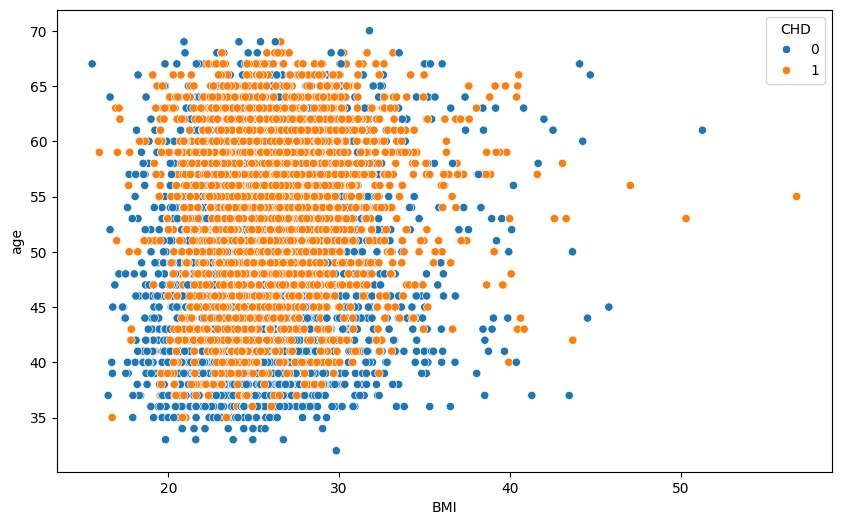

In [171]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_os, x='BMI', y='age', hue='CHD')
plt.show()

**2nd Split Train & Test**

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.3, random_state=0)

**Scaling the Values**

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
sc_train = StandardScaler().fit(X_train)
X_train_sc = sc_train.transform(X_train)

In [176]:
np.set_printoptions(precision=3)
print(X_train_sc[0:5,:])

[[ 1.206 -1.272  2.122 -0.902 -0.798 -0.242 -0.057  1.397 -0.176 -0.784
  -0.529  0.425  1.221 -0.073 -0.031 -1.087]
 [-0.829 -1.029 -0.971  1.108 -0.714 -0.242 -0.057 -0.716 -0.176  0.338
  -0.32   0.11  -0.035  1.754 -0.411 -1.087]
 [-0.829 -1.638  0.458  1.108  2.065 -0.242 -0.057 -0.716 -0.176 -1.107
  -1.238 -1.09  -1.483 -0.408 -0.662 -1.7  ]
 [-0.829 -0.419  0.06   1.108  0.893 -0.242 -0.057 -0.716 -0.176  0.114
  -0.99   0.189 -2.097 -1.379 -0.721 -0.474]
 [ 1.206  0.19  -0.971 -0.902 -0.798 -0.242 -0.057 -0.716 -0.176 -1.883
  -0.571 -0.127 -1.592 -0.073  0.141  0.14 ]]


**Training Model**

**Using Logistic Regression Model**

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
model_lr = LogisticRegression(solver='liblinear')

In [179]:
model_lr.fit(X_train_sc, y_train)

LogisticRegression(solver='liblinear')

**Testing the Model**

In [180]:
sc_test = StandardScaler().fit(X_test)
X_test_sc = sc_test.transform(X_test)

In [181]:
results = model_lr.score(X_test_sc, y_test)
results * 100

72.05803331542182

In [183]:
results = model_lr.score(X_train_sc, y_train)
results * 100

70.99746602165399

**Cross Validation**

In [184]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [185]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_2 = LogisticRegression(solver='liblinear')

In [195]:
lr_2.fit(X_train_sc, y_train)

LogisticRegression(solver='liblinear')

In [186]:
results = cross_val_score(lr_2, X_train_sc, y_train, cv=kfold)
results

array([0.717, 0.703, 0.733, 0.689, 0.737, 0.703, 0.691, 0.712, 0.71 ,
       0.696])

In [187]:
results.mean() * 100.0, results.std() * 100.0

(np.float64(70.90513268711267), np.float64(1.552588803608193))

In [189]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_3 = LogisticRegression(solver='liblinear')
results = cross_val_score(lr_3, X_train_sc, y_train, cv=kfold, scoring='neg_log_loss')
results.mean(), results.std()

(np.float64(-0.5616345760977537), np.float64(0.018550223592975652))

In [190]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
lr_4 = LogisticRegression(solver='liblinear')
results = cross_val_score(lr_4, X_train_sc, y_train, cv=kfold, scoring='roc_auc')
results.mean(), results.std()

(np.float64(0.7813155588194218), np.float64(0.018986390521359597))

In [191]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

<Axes: >

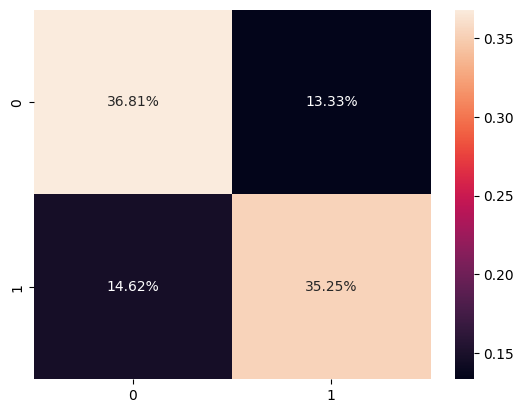

In [198]:
pred_y = lr_2.predict(X_test_sc)
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix/np.sum(matrix), fmt='0.2%', annot=True)

In [200]:
report = classification_report(y_test, pred_y)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       933
           1       0.73      0.71      0.72       928

    accuracy                           0.72      1861
   macro avg       0.72      0.72      0.72      1861
weighted avg       0.72      0.72      0.72      1861



In [203]:
features = list(X_test.columns)
features

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'age_cat_num']

In [204]:
coefficients = lr_2.coef_
coefficients

array([[-0.153,  3.447, -0.05 , -0.448,  0.684,  0.1  , -0.041, -0.213,
        -0.128,  0.06 ,  0.415,  0.125,  0.024, -0.108,  0.308, -2.903]])

In [207]:
coefficients = coefficients.ravel().tolist()
coefficients

[-0.1531629669056225,
 3.4465594987722095,
 -0.05024667028476086,
 -0.448362554849256,
 0.6836652811207254,
 0.09969647822683139,
 -0.04113131970411968,
 -0.21309417612396525,
 -0.12846970663771085,
 0.0603768392412691,
 0.41473777824134805,
 0.12461295679493584,
 0.023853768168603802,
 -0.10809917740644116,
 0.3078307275913465,
 -2.902827144284592]

In [208]:
data = {"Features":features,
        "Coefficients":coefficients}
coef_table = pd.DataFrame(data)
coef_table = coef_table.sort_values(by='Coefficients')
coef_table

,Features,Coefficients
15,age_cat_num,-2.902827
3,currentSmoker,-0.448363
7,prevalentHyp,-0.213094
0,male,-0.153163
8,diabetes,-0.128470
13,heartRate,-0.108099
2,education,-0.050247
6,prevalentStroke,-0.041131
12,BMI,0.023854
9,totChol,0.060377


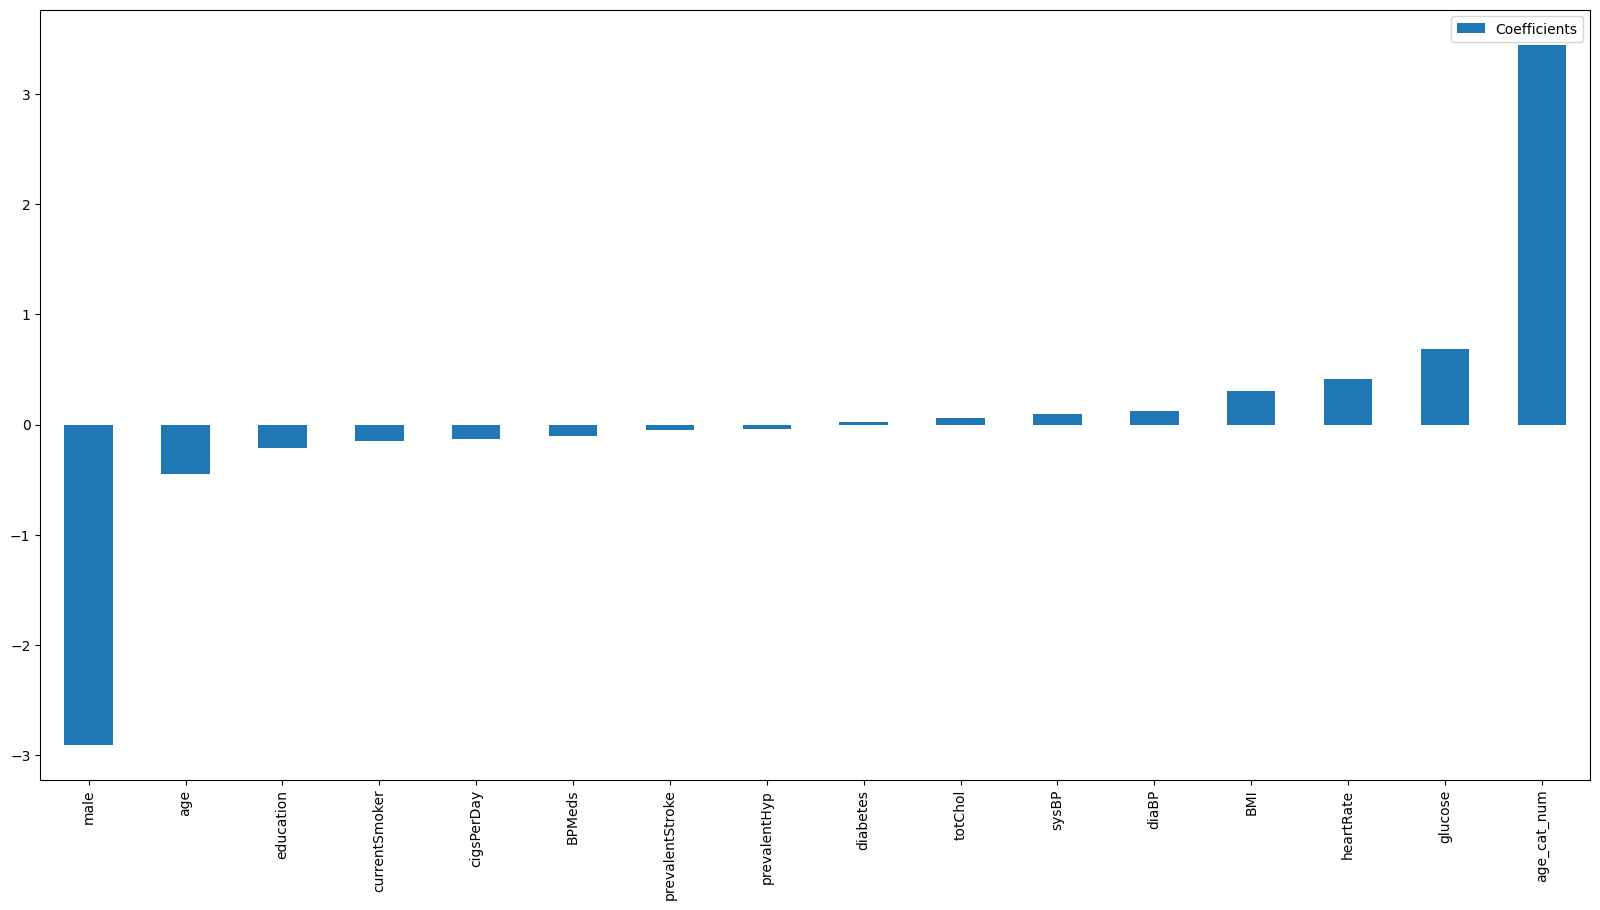

In [212]:
coef_table.plot(kind='bar', figsize=(20,10))
plt.xticks(np.arange(0,16), features)
plt.show()

<h3>Using XGBoost Model</h3>

In [215]:
from xgboost import XGBClassifier

In [216]:
xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='logloss', 
    learning_rate=0.05,      
    max_depth=3,             
    n_estimators=100          
)

In [217]:
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"Average CV Score: {cv_scores.mean():.2f}")

c:\Users\umarf\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\umarf\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\umarf\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

Average CV Score: 0.83


In [218]:
xgb_model.fit(X_train, y_train)

c:\Users\umarf\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [219]:
y_pred = xgb_model.predict(X_test)

In [221]:
from sklearn.metrics import accuracy_score

In [222]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [225]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[846  87]
 [217 711]]


In [226]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       933
           1       0.89      0.77      0.82       928

    accuracy                           0.84      1861
   macro avg       0.84      0.84      0.84      1861
weighted avg       0.84      0.84      0.84      1861



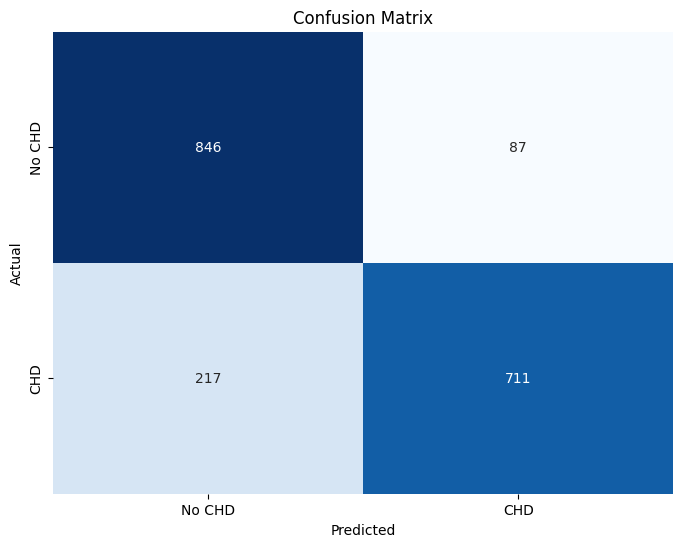

In [227]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No CHD', 'CHD'], yticklabels=['No CHD', 'CHD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [228]:
from xgboost import plot_importance

<Figure size 1000x800 with 0 Axes>

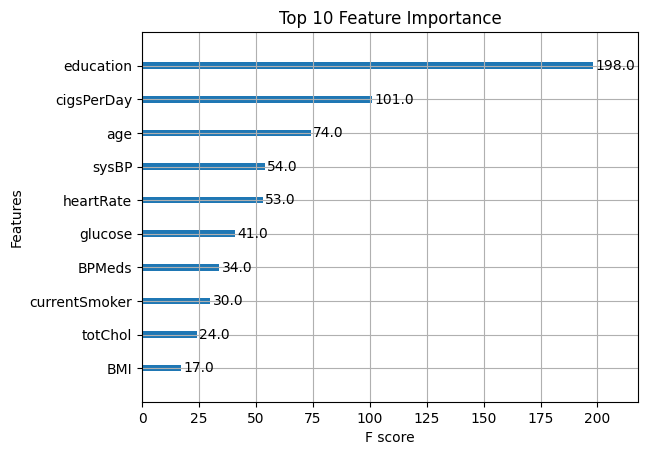

In [229]:
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Feature Importance')
plt.show()

In [234]:
df_fhs

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_cat_num
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,3
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,3
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,6
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,4
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,4
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0,4
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0,2


**Utilize the Model**

In [257]:
def preprocess_input(data):
    """
    Preprocess the input data.
    """
    # Convert input to DataFrame
    data_df = pd.DataFrame([data], columns=X.columns)
    
    # Handle missing values if necessary (e.g., fill with forward fill)
    data_df.ffill(inplace=True)  # Corrected the method usage
    
    # Scale the data if required
    data_scaled = sc_test.transform(data_df)
    
    return data_scaled

In [259]:
def predict_chd(input_data):
    """
    Predict CHD using both models.
    """
    # Preprocess input data
    processed_data = preprocess_input(input_data)
    
    # Predict using Logistic Regression
    lr_prediction = lr_2.predict(processed_data)
    
    # Predict using XGBoost
    xgb_prediction = xgb_model.predict(processed_data)
    
    return lr_prediction[0], xgb_prediction[0]

In [260]:
def display_input_data(input_data):
    """
    Display input data in a readable format.
    """
    print("\n--- Input Data ---")
    for key, value in input_data.items():
        print(f"{key}: {value}")
    print("\n")

In [261]:
def main():
    """
    Main function to handle user input, predictions, and displaying results.
    """
    # Collect user input
    sample_input = {
        'male': int(input("Enter male (1 or 0): ")),
        'age': int(input("Enter age: ")),
        'education': float(input("Enter education level: ")),
        'currentSmoker': int(input("Enter currentSmoker (1 or 0): ")),
        'cigsPerDay': float(input("Enter cigsPerDay: ")),
        'BPMeds': float(input("Enter BPMeds: ")),
        'prevalentStroke': int(input("Enter prevalentStroke (1 or 0): ")),
        'prevalentHyp': int(input("Enter prevalentHyp (1 or 0): ")),
        'diabetes': int(input("Enter diabetes (1 or 0): ")),
        'totChol': float(input("Enter totChol: ")),
        'sysBP': float(input("Enter sysBP: ")),
        'diaBP': float(input("Enter diaBP: ")),
        'BMI': float(input("Enter BMI: ")),
        'heartRate': float(input("Enter heartRate: ")),
        'glucose': float(input("Enter glucose: ")),
        'age_cat_num': int(input("Enter age_cat_num: "))
    }

    # Display the input data
    display_input_data(sample_input)

    # Make predictions
    lr_result, xgb_result = predict_chd(sample_input)
    
    # Display the predictions
    print(f"\nLogistic Regression Prediction: {'CHD' if lr_result == 1 else 'No CHD'}")
    print(f"XGBoost Prediction: {'CHD' if xgb_result == 1 else 'No CHD'}")


In [262]:
if __name__ == "__main__":
    main()


--- Input Data ---
male: 1
age: 50
education: 1.0
currentSmoker: 1
cigsPerDay: 1.0
BPMeds: 0.0
prevalentStroke: 0
prevalentHyp: 1
diabetes: 0
totChol: 313.0
sysBP: 179.0
diaBP: 92.0
BMI: 25.97
heartRate: 66.0
glucose: 86.0
age_cat_num: 4



Logistic Regression Prediction: No CHD
XGBoost Prediction: No CHD
